**Data augmentation**,cropping(kırpma),padding(doldurma), (flipping)çevirme vb. teknikleri kullanarak veri miktarını artırmak için kullanılan bir stratejidir.
Veri büyütme, modeli varyasyonlara karşı daha sağlam hale getirir ve dolayısıyla modelin overfitting olmasını önler.

Artırılmış verileri bellekte depolamak ne pratik ne de verimlidir ve Keras'ın ImageDataGenerator class'ı (ayrıca TensorFlow'un yüksek seviyeli api'sine dahildir: tensorflow.keras) burada devreye girer. ImageDataGenerator, gerçek zamanlı veri artırma ile görüntü verisi yığınları oluşturur.

Generator tarafından üretilen çıktı görüntüleri, giriş görüntüleri ile aynı çıktı boyutlarına sahip olacaktır.
Aşağıda, ImageDataGenerator class'ını kullanarak nelerin elde edilebileceğini görsel olarak göstermek için kullanacağız.


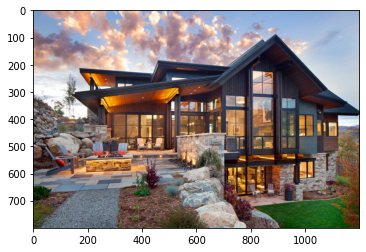

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()
    
image = imread("/content/548127242.jpg")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

**1.Rotation**

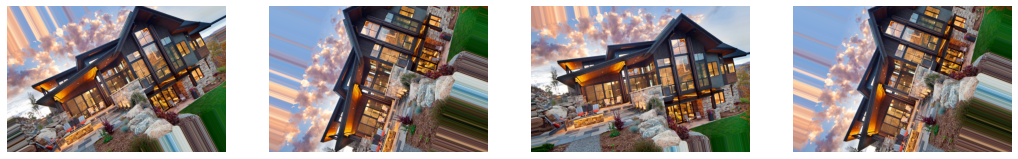

In [4]:
data_generator = ImageDataGenerator(rotation_range=90)
plot(data_generator)

rotation_range belirtildiğinde, oluşturulan veriler +rotation_range ila -rotation_range (derece olarak) aralığındaki bir açıyla rasgele döndürülür.

**2.Width Shifting**

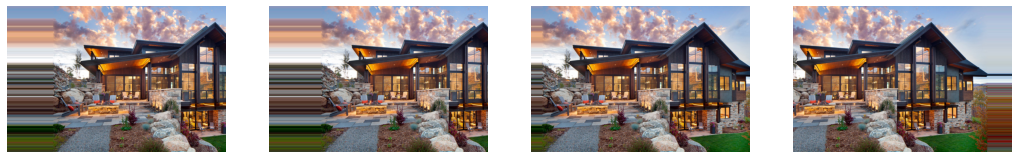

In [5]:
data_generator = ImageDataGenerator(width_shift_range=0.3)
plot(data_generator)

width_shift_range, görüntünün rasgele sola veya sağa kaydırılacağı toplam genişlik kesrinin üst sınırını belirten 0.0 ile 1.0 arasında bir kayan nokta sayısıdır.

**3. Height Shifting**

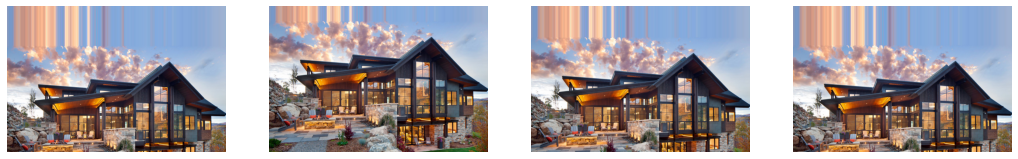

In [6]:
data_generator = ImageDataGenerator(height_shift_range=0.3)
plot(data_generator)

Görüntünün yatay yerine dikey olarak kaydırılması dışında tam olarak genişlik kaydırma gibi.

**4. Brightness**

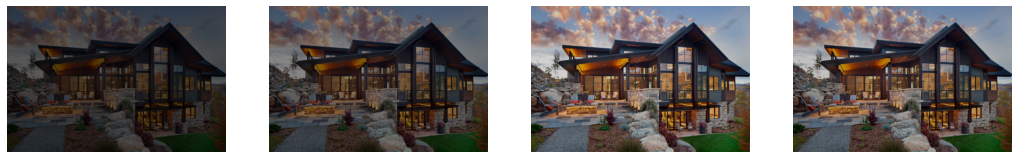

In [7]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
plot(data_generator)

brightness_range, rasgele bir parlaklık kayması değeri seçmek için aralığı belirtir. 0.0 parlaklık kesinlikle parlaklık olmamasına ve 1.0 maksimum parlaklığa karşılık gelir.

**5. Shear Intensity**

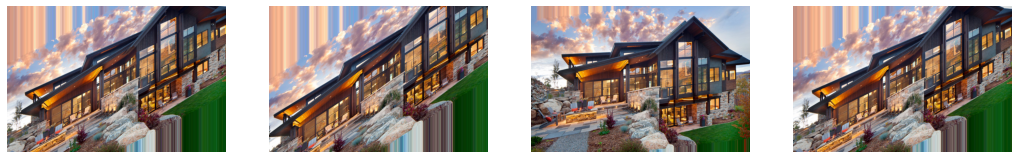

In [8]:
data_generator = ImageDataGenerator(shear_range=45.0)
plot(data_generator)

Shear transformation görüntünün şeklini eğirir. Bu, kesme dönüşümünde bir ekseni sabitlememiz ve görüntüyü kesme açısı olarak bilinen belirli bir açıda germemiz anlamında döndürmeden farklıdır. Bu, görüntüde dönüşte görülmeyen bir tür 'uzama' yaratır. shear_range, eğimin açısını derece olarak belirtir.

**6. Zoom**

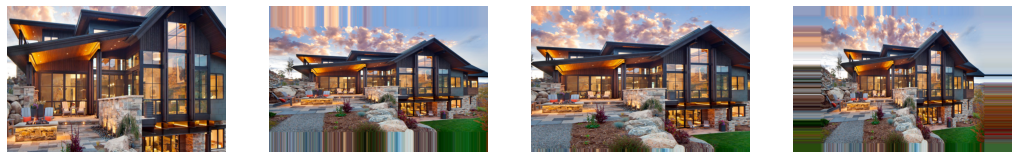

In [9]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(data_generator)

zoom_range bağımsız değişkeni tarafından rastgele bir yakınlaştırma elde edilir. 1.0'dan daha düşük bir yakınlaştırma görüntüyü büyütür, 1.0'dan daha büyük bir yakınlaştırma ise görüntüyü uzaklaştırır.

**7. Channel Shift**

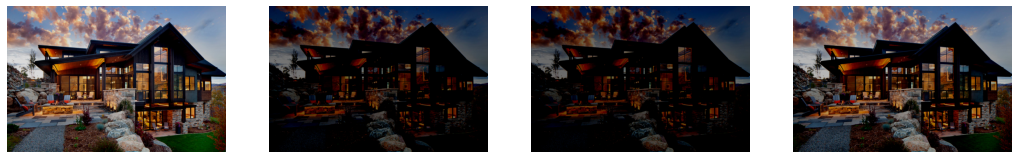

In [10]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
plot(data_generator)

channel_shift_range, kanal(renk kanalı) değerlerini, channel_shift_range ile belirtilen aralıktan seçilen rastgele bir değerle rastgele kaydırır.

**8. Horizontal Flip**

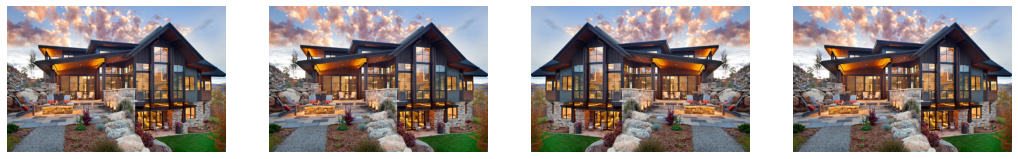

In [11]:
data_generator = ImageDataGenerator(horizontal_flip=True)
plot(data_generator)

Generator, rastgele bir temelde yatay olarak çevrilecek görüntüler üretecektir.

**9. Vertical Flip**

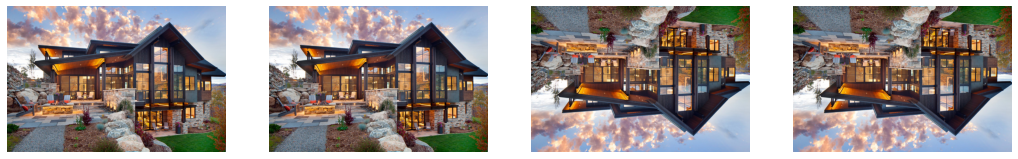

In [12]:
data_generator = ImageDataGenerator(vertical_flip=True)
plot(data_generator)

Yatay çevirme yerine dikey çevirme de uygulayabiliriz.

# **Empty Values**

**1.Nearest**

Bu, en yakın piksel değerinin seçildiği ve tüm boş değerler için tekrarlandığı varsayılan seçenektir.

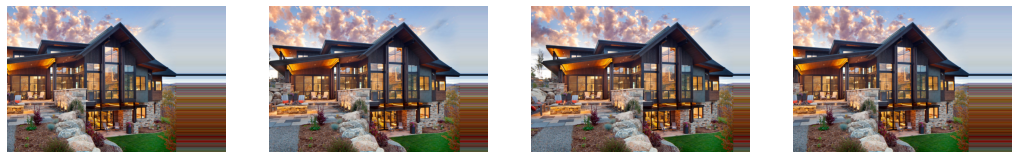

In [13]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='nearest')
plot(data_generator)

**2. Reflect**

Bu method bir "yansıma" yaratır ve boş değerleri bilinen değerlerin tersi sırayla doldurur.

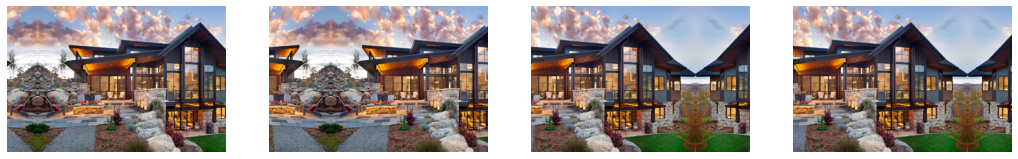

In [14]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='reflect')
plot(data_generator)

**3. Wrap**

Bir yansıtma efekti yerine, sırayı değiştirmeden bilinen noktaların değerlerini bilinmeyen noktalara kopyalayarak bir 'sarma' efekti de oluşturabiliriz.

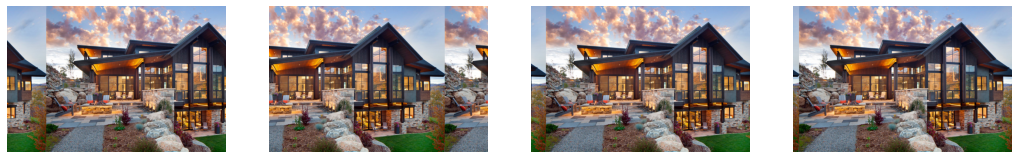

In [15]:
data_generator = ImageDataGenerator(width_shift_range=0.3, fill_mode='wrap')
plot(data_generator)

**4. Constant**

Girdi sınırları dışında kalan tüm noktaları sabit bir değerle doldurmak istiyorsak, bu mod tam olarak bunu elde etmemize yardımcı olur. Sabit değer, cval argümanı tarafından belirtilir.

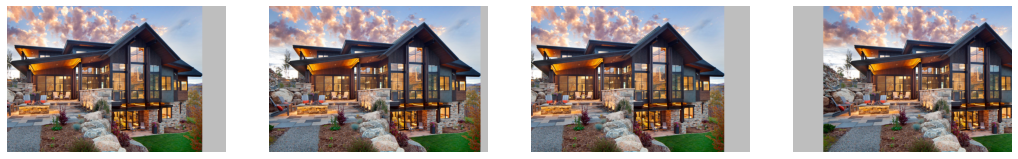

In [16]:
data_generator = ImageDataGenerator(width_shift_range=0.3, 
                                    fill_mode='constant', 
                                    cval=190)
plot(data_generator)